In [1]:
%gui qt5

In [2]:
from eds import spectrum_widget_Qt5 as swidget

In [3]:
thing1 = swidget.EDSSpectraGUI(icon_size=24)

In [4]:
thing1.show()

In [9]:
thing1.pet.itemChanged.connect(print)

In [8]:
eds.utfize

AttributeError: module 'eds' has no attribute 'utfize'

In [5]:
thing1.lineSelector.element_lines('Ca')

AttributeError: 'LineEnabler' object has no attribute 'element_lines'

In [3]:
from eds import element_table_Qt5

In [4]:
tabelka = element_table_Qt5.ElementTableGUI(preenabled=['La'])

In [5]:
tabelka.show()

In [6]:
def toggled_on(thingy):
    print('toggled on ' + thingy)
    
def toggled_off(thingy):
    print('toggled off ' + thingy)

def hovered_over(thingy):
    print('hovered over' + thingy)
    
def hovered_off(thingy):
    print('hovered off' + thingy)

def button_right_clicked(thingy):
    print('right clicked' + thingy)   

def cleared_everything():
    print('all_cleared')

In [7]:
from PyQt5.QtWidgets import QWidget

In [8]:
kuk = QWidget()

In [7]:
tabelka.disableElement.connect(toggled_off)
tabelka.enableElement.connect(toggled_on)
tabelka.elementHoveredOver.connect(hovered_over)
tabelka.elementHoveredOff.connect(hovered_off)
tabelka.someButtonRightClicked.connect(button_right_clicked)
tabelka.allElementsCleared.connect(cleared_everything)

hovered overFr
hovered offFr
all_cleared
hovered overTh
hovered offTh
hovered overPa
hovered offPa
hovered overU
hovered offU
hovered overNp
hovered offNp
hovered overPu
hovered offPu
toggled on Ce
toggled on Tb
toggled on Dy
toggled on Tm
toggled on Sm
toggled on Eu
toggled on Nd
toggled on Gd
toggled on La
toggled on Ho
toggled on Pr
toggled on Yb
toggled on Pm
toggled on Lu
toggled on Er
all_cleared
hovered overTb
hovered offTb
hovered overDy
hovered offDy
hovered overTl
hovered offTl
hovered overSn
hovered offSn
hovered overGe
hovered offGe
hovered overAs
hovered offAs
hovered overS
hovered offS
hovered overO
hovered offO


In [9]:
import pyqtgraph as pg

In [10]:
w = QtGui.QMainWindow()
cw = QtGui.QSplitter(QtCore.Qt.Vertical, w)
w.setCentralWidget(cw)

In [15]:
cw.addWidget(QtGui.QPushButton())

In [14]:
cw.addWidget(thing1)

In [16]:
w.show()

In [35]:
but.close()

True

In [17]:
QtWidgets.QVBoxLayout()

In [9]:
import numpy as np

In [2]:
item1 = pg.PlotCurveItem(clickable=True)

In [10]:
x = np.arange(-0.24,10,0.01)
y = x * np.random.random(1024)

In [11]:
item1.setData(x, y, name='Thingy5')

In [110]:
thing.canvas.p1.addItem(item1)

In [146]:
class EDXListModel(QtCore.QAbstractTableModel):
    def __init__(self, spectras=[[]], headers=['spectras','color'], parent=None):
        QtCore.QAbstractTableModel.__init__(self, parent)
        self._spectras = spectras
        self._headers = headers
    
    def headerData(self, section, orientation, role):
        
        if role == QtCore.Qt.DisplayRole:
            
            if orientation == QtCore.Qt.Horizontal:
                return self._headers[section]
    
    def rowCount(self, parent):
        return len(self._spectras)
    
    def columnCount(self, parent):
        return len(self._spectras[0])+1
    
    def data(self, index, role):
        row = index.row()
        column = index.column()
        if column == 0:
            if role == QtCore.Qt.EditRole:
                if column == 0:
                    return self._spectras[row][0].name()
                elif column == 1:
                    return self._spectras[row][0].opts['pen'].color()
            
        if role == QtCore.Qt.BackgroundRole:
            if column == 1:
                return QtGui.QBrush(self._spectras[row][0].opts['pen'].color())

        if role == QtCore.Qt.DisplayRole:
            if column == 0:
                return self._spectras[row][0].name()
            elif column == 1 and gui_config['show_hex_on_color']:
                return self._spectras[row][0].opts['pen'].color()
            else:
                return self._spectras[row][column-1]
            
        
    def flags(self, index):
        if index.column() == 0:
            return QtCore.Qt.ItemIsEnabled | QtCore.Qt.ItemIsEditable | QtCore.Qt.ItemIsSelectable
        elif index.column() == 1:
            return QtCore.Qt.ItemIsEnabled | QtCore.Qt.ItemIsEditable
        else:
            return QtCore.Qt.ItemIsEnabled
        
    def setData(self, index, value, role = QtCore.Qt.EditRole):
        if role == QtCore.Qt.EditRole:
            try:
                row = index.row()
                column= index.column()
                if column == 0:
                    self._spectras[row][0].opts['name'] = value
                    self._spectras[row][0].setToolTip(value)
                elif column == 1:
                    self._spectras[row][0].opts['pen'].setColor(pg.mkColor(value))
                    self._spectras[row][0].update()
                else:
                    self._spectras[row][column-1] = value
                self.dataChanged.emit(index, index)
                return True
            except:
                return False
        return False
    
    def insertRows(self, position, rows, parent=QtCore.QModelIndex()):
        
        self.beginInsertRows(parent, position,
                             position + rows - 1)
        
        column_count = len(self._spectras[0])
        
        for i in range(rows):
            self._spectras.insert(position, [pg.PlotCurveItem(name='new')])
            for j in range(column_count-1):
                self._spectras[position].insert(j+1, 0.0)
        
        self.endInsertRows()
        
        return True
    
    def removeRows(self, position, rows, parent=QtCore.QModelIndex()):
        self.beginRemoveRows(parent, position,
                             position + rows - 1)
        
        for i in range(rows):
            value = self._spectras[position]
            self._spectras.remove(value)
        
        self.endRemoveRows()
        
        return True
    
    def insertColumns(self, position, columns, parent = QtCore.QModelIndex(), headers=[]):
        self.beginInsertColumns(parent, position, position + columns -1)
        
        row_count = len(self._spectras)
        
        for i in range(columns):
            self._headers.insert(position, headers[i])
            for j in range(row_count):
                self._spectras[j].insert(position, 0.0)
                
        self.endInsertColumns()
        
        return True
    
    def removeColumns(self, position, columns, parent=QtCore.QModelIndex()):
        self.beginRemoveColumns(parent, position,
                             position + columns - 1)
        
        row_count = len(self._spectras)
        
        for j in range(columns):
            self._headers.remove(self._headers[position])
            for i in range(row_count):
                value = self._spectras[i][position]
                self._spectras[i].remove(value)
        
        self.endRemoveColumns()
        
        return True

In [ ]:
GenericEDSItem(object):
    def __init__(self, stuff):
        self.eds_spectra = None
        self.
        

In [147]:
model = EDXListModel(spectras=[[item1]])

In [148]:
thing.spectra_list.setModel(model)
#listView.setModel(model)
tableView.setModel(model)

In [104]:
tableView = QtGui.QTableView()
tableView.show()

In [123]:
itemthing = model._spectras[0][0]

In [ ]:
item1.update()

In [145]:
parentio = item1.parentItem()
parentio.update()

In [144]:
parpar = parentio.parentItem()
parpar.update()

In [146]:
item1.show()

In [135]:
hh.boundingRect()

PyQt4.QtCore.QRectF(-0.24, -0.20359824149171718, 10.23000000000001, 9.747530133175472)

In [186]:
model.insertColumns(1, 1, headers=['af4b4'])

True

In [101]:
model.insertRows(1,5)

True

In [188]:
model.removeColumns(1, 2)

True

In [216]:
pg.PlotCurveItem??

In [238]:
pen = item1.opts['pen']

In [248]:
pen.setColor(QtCore.Qt.red)

In [237]:
pixmap = QtGui.QPixmap(26, 26)


In [241]:
pixmap.fill(pen.color())

In [255]:
item1.setToolTip

In [130]:
model.insertRows(1, 5)

True

In [136]:
model.removeColumn(1)

NameError: name 'rows' is not defined

False

In [133]:
listView = QtGui.QListView()

In [39]:
listView.setModel(model)

In [22]:
listView.show()

In [228]:
tableView.setItemDelegateForColumn(1, ButtonDelegate(tableView))

In [163]:
class TableView(QtGui.QTableView):
    """
    A simple table to demonstrate the QComboBox delegate.
    """
    def __init__(self, *args, model=None, **kwargs):
        QtGui.QTableView.__init__(self, *args, **kwargs)
        self.setModel(model)
        self.setContextMenuPolicy(QtCore.Qt.DefaultContextMenu)
        # Set the delegate for column 1 of our table
        #self.setItemDelegateForColumn(1, ButtonDelegate(self))
        #self.initial_editor()
    
    #def initial_editor(self):
    #    for row in range(self.model().rowCount(self)):
    #        self.openPersistentEditor(self.model().index(row, 1))
    #    
    #def add_editor(self, index):
    #    row = index.row()
    #    self.openPersistentEditor(index(row, 1))
    #        
    #def remove_editor(self, index):
    #    row = index.row()
    #    self.closePersistentEditor(index(row, 1))
    def contextMenuEvent(self, event):
        handled = False
        index = self.indexAt(event.pos())
        menu = QtGui.QMenu()
        #an action for everyone
        every = QtGui.QAction("I'm for everyone", menu)
        if index.column() == 1:  #treat the Nth column special row...
            action_1 = QtGui.QAction("Something Awesome", menu)
            action_2 = QtGui.QAction("Something Else Awesome", menu)
            menu.addActions([action_1, action_2])
            handled = True
            pass

        if handled:
            menu.addAction(every)
            menu.exec_(event.globalPos())
            event.accept() #TELL QT IVE HANDLED THIS THING
            pass
        else:
            event.ignore() #GIVE SOMEONE ELSE A CHANCE TO HANDLE IT
            pass
        return
            
    def openAction(self, row, column):
        pass

    def deleteSelected(self):
        # TODO
        pass  

In [161]:
tableView.show()

In [164]:
tableView = TableView(model=model)
tableView.show()

In [44]:
tableView.setModel(model)

In [383]:
model.index(0,0)

In [382]:
tableView.model().index(0,0)

In [24]:
tableView.setModel(model)
#for row in range(model.rowCount(tableView)):
#    tableView.openPersistentEditor(model.index(row, 1))

In [31]:
tableView.update_color()

AttributeError: 'TableView' object has no attribute 'update_color'

In [32]:
tableView.setEditTriggers(QtGui.QAbstractItemView.AllEditTriggers)

In [34]:
aa = QtGui.QAbstractItemView.editTriggers(tableView)

In [37]:
QtGui.QStyledItemDelegate

PyQt4.QtGui.QStyledItemDelegate

In [268]:
tableView.model()

In [348]:
tableView.update_color()

In [37]:
model.insertRows(1,2)

True

In [359]:
tableView.

0

In [63]:
model._spectras

[[<pyqtgraph.graphicsItems.PlotCurveItem.PlotCurveItem at 0x7ff583215438>,
  '56',
  '5'],
  0.0],

In [96]:
a = pandas.DataFrame()

In [99]:
a = a.append(['thingy','thingsy','awesome'])

In [115]:
a = pandas.concat([a, pandas.DataFrame([item1, item1, item1])], axis=1)

In [117]:
a.spectra

0     thingy
1    thingsy
2     awsome
Name: spectra, dtype: object

In [114]:
a.append([item1, item1, item1], index=[0,1,2] )

TypeError: append() got an unexpected keyword argument 'index'

In [189]:
hdhd = [1,2,3,4,5,6,7,8]

In [190]:
hdhd.pop(4)

5

In [200]:
item1.opts['pen'].setColor

<function QPen.setColor>

In [ ]:
class ColorDelegate(QtGui.QAbstractItemDelegate):
    def __init__(self, parent):
        QtGui.QItemDelegate.__init__(self, parent)
        
    def paint(self, painter, option, index):
        if index.column() == 1:
            

In [15]:
class ButtonDelegate(QtGui.QStyledItemDelegate):

    def __init__(self, parent):
        QtGui.QItemDelegate.__init__(self, parent)

    def createEditor(self, parent, option, index):
        combo = pg.ColorButton(parent, index.data())

        #self.connect(combo, QtCore.SIGNAL("currentIndexChanged(int)"), self, QtCore.SLOT("currentIndexChanged()"))
        combo.sigColorChanged.connect(self.currentIndexChanged)
        return combo
        
    def setEditorData(self, editor, index):
        editor.blockSignals(True)
        #editor.setColor(index.data(index))
        editor.blockSignals(False)
        
    def setModelData(self, editor, model, index):
        model.setData(index, editor.color())
        
    @QtCore.pyqtSlot()
    def currentIndexChanged(self):
        self.commitData.emit(self.sender())

In [211]:
class ButtonDelegate(QtGui.QItemDelegate):

    def __init__(self, parent):
        QtGui.QItemDelegate.__init__(self, parent)

    def createEditor(self, parent, option, index):
        combo = pg.ColorButton(parent, index.data())

        #self.connect(combo, QtCore.SIGNAL("currentIndexChanged(int)"), self, QtCore.SLOT("currentIndexChanged()"))
        combo.clicked.connect(self.currentIndexChanged)
        return combo
        
    def setEditorData(self, editor, index):
        editor.blockSignals(True)
        editor.setColor(int(index.model().data(index)))
        editor.blockSignals(False)
        
    def setModelData(self, editor, model, index):
        model.setData(index, editor.color())
        
    @QtCore.pyqtSlot()
    def currentIndexChanged(self):
        self.commitData.emit(self.sender())

In [202]:
but = pg.ColorButton()

In [203]:
but.show()

In [208]:
but.setColor(pg.mkColor('r'))

In [207]:
pg.mkColor('r')

In [210]:
but.color()

In [234]:
kaka = ButtonDelegate(None)

In [236]:
but.sigColorChanged.

TypeError: colorSelected() missing 1 required positional argument: 'color'

In [325]:
index = model.index(0,1)

In [329]:
index.data()

In [5]:
TableView.

SyntaxError: invalid syntax (<ipython-input-5-e3e1f4881366>, line 1)

In [12]:
class ComboBox(QtGui.QWidget):
    def __init__(self, color_dict, parent=None):
        QtGui.QWidget.__init__(self, parent)
        # setGeometry(x_pos, y_pos, width, height)
        self.setGeometry(320, 200, 340, 220)
        self.setWindowTitle('Select a color from the combo box')
        self.combo = QtGui.QComboBox(self)
        self.frame = QtGui.QFrame(self)
        self.frame.setFrameStyle(QtGui.QFrame.Box | QtGui.QFrame.Sunken)
        grid = QtGui.QGridLayout()
        # addWidget(QWidget, row, column, rowSpan, columnSpan)
        grid.addWidget(self.combo, 1, 1, 1, 1)
        grid.addWidget(self.frame, 1, 2, 3, 2)
        self.setLayout(grid)
        self.color_dict = color_dict
        # create a sorted color list
        self.color_list = sorted(color_dict.keys())
        # load the combobox
        for color in self.color_list:
            self.combo.addItem(color)
        # bind/connect selection to an action method
        self.connect(self.combo, QtCore.SIGNAL('currentIndexChanged(QString)'),
            self.changedIndex)
    def changedIndex(self, value):
        """
        item in the combox has been changed/selected
        """
        #print("value = %s" % value)  # test
        color = value
        # change color of widget self.frame
        style_str = "QWidget {background-color: %s}"
        self.frame.setStyleSheet(style_str % self.color_dict[color])
# colors are in HTML '#RRGGBB' format --> Red, Green, Blue hex 00 to ff
color_dict = {
'red': '#ff0000',
'green': '#00ff00',
'blue': '#0000ff',
'yellow': '#ffff00',
'gold': '#ffd700',
'pink': '#ffc0cb',
'bisque': '#ffe4c4',
'ivory': '#fffff0',
'black': '#000000',
'white': '#ffffff',
'violet': '#ee82ee',
'silver': '#c0c0c0',
'forestgreen': '#228b22',
'brown': '#a52a3a',
'chocolate': '#d2691e',
'azure': '#fffff0',
'orange': '#ffa500'
}

combo = ComboBox(color_dict)
combo.show()

In [13]:
asdasd = QtGui.QColorDialog()

In [14]:
asdasd.show()

In [ ]:
class QtColorPicker(QtGui.QPushButton):
    sigColorChanging = QtCore.Signal(object)  ## emitted whenever a new color is picked in the color dialog
    sigColorChanged = QtCore.Signal(object)   ## emitted when the selected color is accepted (user clicks OK)
    
    def __init__(self, parent=None, columns=-1, enableColorDialog=True, color=):
        QtGui.QPushButton.__init__(self, parent)

In [11]:
kaka = ColorButton()
kaka.show()

In [8]:
from PyKDE4.kdeui import KColorCells

ImportError: No module named 'PyKDE4'

In [15]:
img_dummy = pg.ImageItem()
plt_dummy = pg.PlotCurveItem()

In [34]:
type(img_dummy) == pg.ImageItem

True

In [17]:
from parsers import bxml, bcf

In [18]:
from lxml import objectify

In [19]:
from glob import glob
import pyqtgraph as pg

In [16]:
spx_list = glob('test/*.spx')

In [17]:
plt = {}
for i in spx_list[:2]:
    root = objectify.parse(i)
    rot = root.getroot()
    eds = rot.ClassInstance
    thingy = bxml.AnalysedEDXSpectrum(eds)
    plt[i] = pg.PlotWidget()
    plt[i].addItem(pg.PlotDataItem(thingy.energy, thingy.data))
    for k in thingy.roi_results:
        if 'Energy' in thingy.roi_results[k]:
            bounds = thingy.make_roi(thingy.roi_results[k]['Energy'])
            plt[i].addItem(pg.LinearRegionItem(values=bounds))
    plt[i].show()
    
    #for j in thingy.roi_results:
    #    if j not in ['O', 'Al', 'Si', 'Th', 'Ti', 'Sm', 'Fe']:
    #        print(j, thingy.roi_results[j]['Energy'], thingy.roi_results[j]['Width'])

In [11]:
root = objectify.parse('test/notcompressed_proj.rtx')

In [12]:
rot = root.getroot()

In [13]:
eds = rot.ClassInstance.ChildClassInstances.ClassInstance[0].ChildClassInstances.ClassInstance[1]

In [14]:
thingy = bxml.AnalysedEDXSpectrum(eds)

In [16]:
thingy.data[thingy.meta.energy_to_channel(
    thingy.roi_results['Al']['Energy'] - (thingy.roi_results['Al']['Width']/2)):
 thingy.meta.energy_to_channel(
    thingy.roi_results['Al']['Energy'] + (thingy.roi_results['Al']['Width']/2))+1].sum() / 1.01671803

28400.204528683335

In [20]:
from periodictable import elements

In [10]:
elements.Fe.K_alpha

1.9373

In [17]:
thingy.roi_results

{'Al': {'Counts': 28875,
  'Description': 'Al-KA',
  'Energy': 1.486366126,
  'Line': 'KA',
  'NetCounts': 28278,
  'ROI': [1.4413575687408464, 1.5313746832591537],
  'Width': 0.09886848539},
 'C': {'Counts': 4709,
  'Description': 'C-K',
  'Energy': 0.277,
  'Line': 'K',
  'NetCounts': 4635,
  'ROI': [0.2554931938821738, 0.29850680611782626],
  'Width': 0.05651262782},
 'Ca': {'Counts': 4488,
  'Description': 'Ca-KA',
  'Energy': 3.691130226,
  'Line': 'KA',
  'NetCounts': 3853,
  'ROI': [3.6185055773805446, 3.763754874619455],
  'Width': 0.1475573642},
 'Fe': {'Counts': 1153,
  'Description': 'Fe-KA',
  'Energy': 6.400794531,
  'Line': 'KA',
  'NetCounts': 885,
  'ROI': [6.305928272406555, 6.495660789593445],
  'Width': 0.1910994811},
 'Na': {'Counts': 2248,
  'Energy': 1.041,
  'Line': 'Ka',
  'NetCounts': 2248,
  'ROI': [1.0035926106667439, 1.078407389333256]},
 'O': {'Counts': 28833,
  'Description': 'O-K',
  'Energy': 0.5249,
  'Line': 'K',
  'NetCounts': 28635,
  'ROI': [0.49774

In [21]:
thingy

In [23]:
thingy

In [17]:
thingy._estimate_abc_for_2_sigmas()

In [13]:
thingy.make_roi(6.400794531)

[6.305928272406555, 6.495660789593445]

In [11]:
import numpy as np

In [17]:
from scipy.interpolate import UnivariateSpline

In [19]:
hoho = UnivariateSpline(thingy.energy[:2*thingy.zeroPeakPosition], thingy.data[:2*thingy.zeroPeakPosition]-np.max(thingy.data[thingy.zeroPeakPosition-3:thingy.zeroPeakPosition+3])/2)

In [23]:
np.diff(hoho.roots())

array([ 0.02660204])

In [22]:
thingy.data[:2*thingy.zeroPeakPosition]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    1,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          2,    0,    2,   11,   16,   36,   71,  101,  162,  251,  423,
        598,  810, 1090, 1374, 1597, 1918, 2124, 2248, 2153, 2068, 1800,
       1657, 1337, 1060,  799,  584,  391,  283,  164,  118,   68,   28,
         18,    8,    6,    0,    0,    0,    2,    1,    1,    0,    1,
          2,    1,    1,    1,    0,    1,    0,    0,    1,    0,    0,
          0,    2,    1,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,   17,   38,   25,   21,   35,   

In [55]:
hoho.roots()

array([-0.01893184,  0.01955399])

In [53]:
np.diff(hoho.roots())

array([ 0.03848604])

In [3]:
import pyqtgraph as pg

In [44]:
plt = pg.PlotWidget()

In [45]:
plt.show()

In [46]:
crv = pg.PlotDataItem(thingy.energy, thingy.data)
vreg = pg.LinearRegionItem(values=hoho.roots())

In [48]:
plt.addItem(crv)

In [51]:
vreg = pg.LinearRegionItem(values=hoho.roots())
plt.addItem(vreg)

In [168]:
np.diff(hoho.roots()/2.355 *4)[0] 

0.045139602714378321

In [149]:
from math import log, exp

In [132]:
kaka = lambda x: -0.0612674 + 0.11484 * log(x + 2.53485)

In [155]:
(exp(1)-2.53485) / 3

0.06114394281968168

In [161]:
for i in thingy.roi_results:
    try:
        ghg = pg.LinearRegionItem(values=[thingy.roi_results[i]['Energy'] - thingy.roi_results[i]['Width']/2,
                                          thingy.roi_results[i]['Energy'] + thingy.roi_results[i]['Width']/2])
        plt.addItem(ghg)
    except:
        pass

In [17]:
thingy.roi_results

{'Al': {'Counts': 28875,
  'Description': 'Al-KA',
  'Energy': 1.486366126,
  'Line': 'KA',
  'NetCounts': 28278,
  'Width': 0.09886848539},
 'C': {'Counts': 4709,
  'Description': 'C-K',
  'Energy': 0.277,
  'Line': 'K',
  'NetCounts': 4635,
  'Width': 0.05651262782},
 'Ca': {'Counts': 4488,
  'Description': 'Ca-KA',
  'Energy': 3.691130226,
  'Line': 'KA',
  'NetCounts': 3853,
  'Width': 0.1475573642},
 'Fe': {'Counts': 1153,
  'Description': 'Fe-KA',
  'Energy': 6.400794531,
  'Line': 'KA',
  'NetCounts': 885,
  'Width': 0.1910994811},
 'Na': {'Counts': 2248, 'NetCounts': 2248},
 'O': {'Counts': 28833,
  'Description': 'O-K',
  'Energy': 0.5249,
  'Line': 'K',
  'NetCounts': 28635,
  'Width': 0.06739981099},
 'Si': {'Counts': 80180,
  'Description': 'Si-KA',
  'Energy': 1.7396,
  'Line': 'KA',
  'NetCounts': 79532,
  'Width': 0.1056080558}}

In [92]:
c = elements.symbol(i)
c.number

6

In [20]:
import pyqtgraph as pg

In [21]:
pg.plot(thingy.energy, thingy.data)

In [94]:
thingy.roi_results['Al']

{'Counts': 28875,
 'Description': 'Al-KA',
 'Energy': 1.486366126,
 'Line': 'KA',
 'NetCounts': 28278,
 'Width': 0.09886848539}

TypeError: 'PeriodicTable' object is not callable

In [21]:
kaka = bcf.BCF_reader('/home/petras/bulk-data/hackingBCF/maping_F.bcf')

spectrum have no name...
spectrum have no dead time records...
/home/petras/.local/lib/python3.5/site-packages/scipy/interpolate/fitpack2.py:222: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


In [32]:
from copy import copy

In [33]:
gogo = copy(thingy)

In [38]:
gogo.meta.amplification = 20000
gogo.meta.amplification, thingy.meta.amplification

(20000, 20000)

In [10]:
def parse_line(line_string):
    if len(line_string) == 1:
        line_string = line_string + 'a'
    return line_string.capitalize()

In [15]:
['_'.join([i,parse_line(kaka.header.elements[i]['line'])])
                              for i in kaka.header.elements]

['Na_Ka',
 'C_Ka',
 'Mg_Ka',
 'Ti_Ka',
 'Fe_Ka',
 'Al_Ka',
 'Si_Ka',
 'P_Ka',
 'O_Ka',
 'K_Ka',
 'Zr_Ka',
 'Mn_Ka',
 'Cr_Ka',
 'Ca_Ka']

In [22]:
asdas = kaka.header.get_spectra_metadata()

In [24]:
kaka.persistent_parse_hypermap()

In [25]:
img = pg.image()

In [27]:
kaka.hypermap[0].hypermap

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ..., 
       [[3, 6, 3, ..., 4, 0, 1],
        [2, 0, 2, ..., 4, 1, 2],
        [3, 1, 1, ..., 2, 3, 1],
        ..., 
        [3, 1, 3, ..., 1, 3, 1],
        [1, 3, 1, ..., 1, 3, 2],
        [1, 1, 1, ..., 1, 1, 2]],

       [[0, 3, 0, ..., 1, 2, 1],
        [3, 2, 3, ..., 1, 1, 1],
        [2, 2, 0, ..., 1, 2, 3],
        ..., 
        [5, 3, 0, 

In [26]:
img.setImage(kaka.hypermap[0].hypermap)

/mnt/bulk-data/development/git/QBHM_viewer/qbhm_viewer/pyqtgraph/graphicsItems/ImageItem.py:391: RuntimeWarning: invalid value encountered in double_scalars
  bins = np.arange(mn, mx+1.01*step, step, dtype=np.int)


In [1]:
import pandas as pd

In [73]:
import periodictable

SyntaxError: invalid syntax (<ipython-input-73-c7b83d58a1ac>, line 1)

In [86]:
periodictable.elements.symbol('Fe')

Fe

In [51]:
from periodictable import elements

In [9]:
str(elements[5])

'B'

In [30]:
thing = {'Al': [0.544,0.666], 'Si':[0.789, 0.899], 'Ga':[1.0,1.05], 'Hf':[2.1, 2.3]}

In [35]:
thing.update()

[0.544, 0.666]

In [36]:
thing

{'Ga': [1.0, 1.05], 'Hf': [2.1, 2.3], 'Si': [0.789, 0.899]}

In [26]:
thingy.roi_results is False

False

In [1]:
from math import exp

In [5]:
a = exp(1)
b = 1

In [7]:
%%timeit
a

10000000 loops, best of 3: 42.8 ns per loop


In [ ]:
thingy = {'asd': 5}

In [14]:
new_dict = {}
for i in xu.elements:
    new_dict[i] ={'K_lines': {},
                  'L_lines': {},
                  'M_lines': {}}
    for j in xu.elements[i]['Atomic_properties']['Xray_lines']:
        if 'K' in j:
            new_dict[i]['K_lines'][j] = True
        elif 'M' in j:
            new_dict[i]['M_lines'][j] = True
        elif 'L' in j:
            new_dict[i]['L_lines'][j] = True
        print('\t'+j, xu.elements[i]['Atomic_properties']['Xray_lines'][j])

	Ma {'energy (keV)': 0.8455, 'weight': 1.0}
	Lg1 {'energy (keV)': 6.0542, 'weight': 0.0764}
	Lb3 {'energy (keV)': 5.3634, 'weight': 0.1325}
	Mb {'energy (keV)': 0.8154, 'weight': 0.91}
	La {'energy (keV)': 4.8401, 'weight': 1.0}
	Mg {'energy (keV)': 1.0754, 'weight': 0.5}
	Ln {'energy (keV)': 4.7296, 'weight': 0.015}
	Kb {'energy (keV)': 39.2576, 'weight': 0.15}
	Ll {'energy (keV)': 4.2888, 'weight': 0.0436}
	Lb1 {'energy (keV)': 5.2629, 'weight': 0.43}
	Lb2 {'energy (keV)': 5.6134, 'weight': 0.19399}
	Lg3 {'energy (keV)': 6.3416, 'weight': 0.0324}
	Ka {'energy (keV)': 34.7196, 'weight': 1.0}
	Mz {'energy (keV)': 0.6761, 'weight': 0.07}
	M2N4 {'energy (keV)': 1.1628, 'weight': 0.08}
	Lb4 {'energy (keV)': 5.276, 'weight': 0.08699}
	Kb {'energy (keV)': 10.2642, 'weight': 0.1287}
	Lb3 {'energy (keV)': 1.1948, 'weight': 0.0461}
	Ll {'energy (keV)': 0.9573, 'weight': 0.0544}
	Lb1 {'energy (keV)': 1.1249, 'weight': 0.16704}
	Ka {'energy (keV)': 9.2517, 'weight': 1.0}
	La {'energy (keV)': 1.0

In [32]:
for i in new_dict:
    for j in new_dict[i]:
        print(i, j, new_dict[i][j] == {})
        if new_dict[i][j] == {}:
            new_dict[i].pop(j)

Ce L_lines False
Ce M_lines False
Ce K_lines False
Ga L_lines False
Ga K_lines False
W L_lines False
W M_lines False
W K_lines False
Pu L_lines False
Pu M_lines False
Pu K_lines False
Au L_lines False
Au M_lines False
Au K_lines False
Al L_lines True


RuntimeError: dictionary changed size during iteration

In [136]:
import json

In [140]:
with open('lines.json', 'w') as fn:
    fn.write(json.dumps(new_dict, indent=4))

In [135]:
new_dict

{'Ac': {'K_lines': {'Ka': True, 'Kb': True},
  'L_lines': {'La': True,
   'Lb1': True,
   'Lb2': True,
   'Lb3': True,
   'Lg1': True,
   'Lg3': True,
   'Ll': True,
   'Ln': True},
  'M_lines': {'M2N4': True,
   'M3O4': True,
   'M3O5': True,
   'Ma': True,
   'Mb': True,
   'Mg': True,
   'Mz': True}},
 'Ag': {'K_lines': {'Ka': True, 'Kb': True},
  'L_lines': {'La': True,
   'Lb1': True,
   'Lb2': True,
   'Lb3': True,
   'Lb4': True,
   'Lg1': True,
   'Lg3': True,
   'Ll': True,
   'Ln': True}},
 'Al': {'K_lines': {'Ka': True, 'Kb': True}},
 'Ar': {'K_lines': {'Ka': True, 'Kb': True}},
 'As': {'K_lines': {'Ka': True, 'Kb': True},
  'L_lines': {'La': True, 'Lb1': True, 'Lb3': True, 'Ll': True, 'Ln': True}},
 'At': {'K_lines': {'Ka': True, 'Kb': True},
  'L_lines': {'La': True,
   'Lb1': True,
   'Lb2': True,
   'Lb3': True,
   'Lb4': True,
   'Lg1': True,
   'Lg3': True,
   'Ll': True,
   'Ln': True},
  'M_lines': {'M2N4': True, 'Mb': True, 'Mg': True, 'Mz': True}},
 'Au': {'K_lines

In [5]:
from PyQt5 import QtWidgets, QtCore

In [6]:
kuk = QtWidgets.QPushButton('asdas')
kuk.show()

In [7]:
kuk.

True

In [22]:
class LeavableTreeView(QtWidgets.QTreeView):
    
    mouseLeft = QtCore.pyqtSignal() 
    
    def __init__(self, parent=None):
        super().__init__(parent)
        
    def leaveEvent(self, event):
        self.mouseLeft.emit()
        super().leaveEvent(event)
        

In [23]:
asdas = LeavableTreeView(None)

In [24]:
asdas.show()

In [25]:
def test():
    print('left')

In [26]:
asdas.leaved.connect(test)

left
left
left
left
left
left
left
left


In [5]:
def overvoltage(energy, hv):
    """
    return reduced xray line hight using
    very oversimplified model for HV -> Xray intensity
    which is fast and coarse approximation but not the
    real model.
    it gives maximum peak at 2.7 or (exp(1)) ratio of
    aceleration voltage"""
    return log(hv / energy) / (hv / energy) * e

In [6]:
import numpy as np

In [10]:
x = np.arange(0.1,30, 0.1)

In [27]:
y = np.log(30 / x) / ( 30 / x) * np.exp(1)

In [16]:
import matplotlib.pyplot as plt

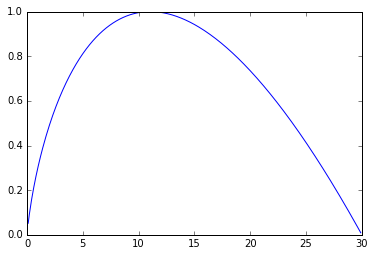

In [28]:
plt.plot(x,y)
plt.show()

In [29]:
bruker_stringy = 'eJyzcUkt8UmsTC0qtrMB0wYKjiX5ubZKhsZKCiEZmcnZeanFxbZKpq66xkr6UDWGUDXmKEos9ICKjOCKjKCKTFEUmSGbYwxVYoZbiQlUiQWqErhV+gj3AwCpRT07'

In [30]:
import base64

In [38]:
kaka = np.fromstring(base64.b64decode(bruker_stringy),dtype='int8')

In [39]:
plt.plot(kaka)

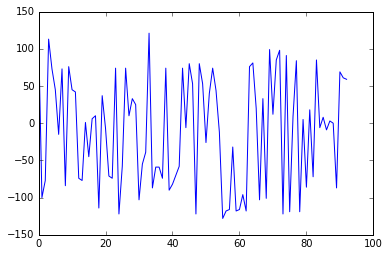

In [40]:
plt.show()

In [44]:
with open('wooty.bin', 'bw') as wooty:
    wooty.write(base64.b64decode(bruker_stringy))

In [45]:
import zlib

In [46]:
zlib.decompress(base64.b64decode(bruker_stringy))

b'<DetLayers><Layer0 Atom="13" Thickness="5E-3"/><Layer1 Atom="7" Thickness="8.5E-2"/><Layer2 Atom="5" Thickness="6E-3"/><Layer3 Atom="6" Thickness="6E-3"/><Layer4 Atom="8" Thickness="6.5E-2"/></DetLayers>'